In [1]:
from keras.datasets import fashion_mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
(X, y), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X.shape

(60000, 28, 28)

In [4]:
y=to_categorical(y)
y_train=y
y_test=to_categorical(y_test)

In [5]:
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

In [6]:
X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [7]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [8]:
net.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 12s 26ms/step - loss: 0.6690 - acc: 0.7575
Epoch 2/20
469/469 [==============================] - 14s 30ms/step - loss: 0.4743 - acc: 0.8292
Epoch 3/20
469/469 [==============================] - 16s 35ms/step - loss: 0.4303 - acc: 0.8436
Epoch 4/20
469/469 [==============================] - 16s 35ms/step - loss: 0.4104 - acc: 0.8515
Epoch 5/20
469/469 [==============================] - 22s 47ms/step - loss: 0.3953 - acc: 0.8567
Epoch 6/20
469/469 [==============================] - 25s 54ms/step - loss: 0.3848 - acc: 0.8592 1s - loss: 0 - ETA: 0s - loss: 0.3855 - acc: 
Epoch 7/20
469/469 [==============================] - 20s 42ms/step - loss: 0.3699 - acc: 0.8664
Epoch 8/20
469/469 [==============================] - 26s 55ms/step - loss: 0.3649 - acc: 0.8675
Epoch 9/20
469/469 [==============================] - 26s 55ms/step - loss: 0.3599 - acc: 0.8695
Epoch 10/20
469/469 [==============================] - 25s 53ms/step - loss: 0.35

In [9]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3287 - acc: 0.8841


In [10]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

In [11]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
val = net.fit(partial_X_train,partial_y_train, epochs=20, batch_size=128,validation_data=(X_val, y_val),verbose=0)

In [13]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

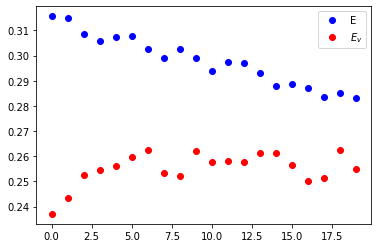

In [14]:
x = np.arange(0, len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

In [15]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 <matplotlib.image.AxesImage at 0x203ae97cb08>)

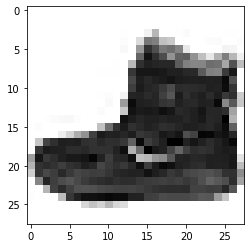

In [16]:
y[0], plt.imshow(X[0],cmap=plt.cm.binary) # Ankle boot

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x203aea33e48>)

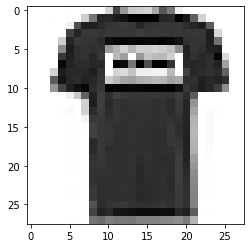

In [17]:
y[1], plt.imshow(X[1],cmap=plt.cm.binary) # T-shirt

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x203aea3f288>)

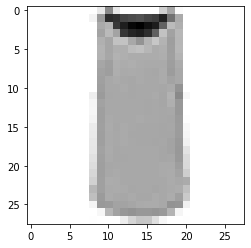

In [18]:
y[2], plt.imshow(X[2],cmap=plt.cm.binary)

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x2038e113688>)

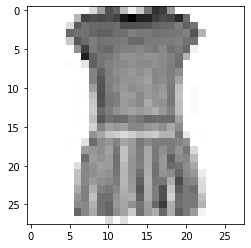

In [19]:
y[3], plt.imshow(X[3],cmap=plt.cm.binary)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x2038dfcb1c8>)

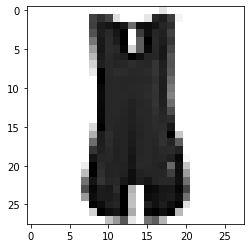

In [20]:
y[4], plt.imshow(X[4],cmap=plt.cm.binary)

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x203aebc76c8>)

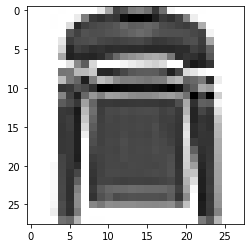

In [21]:
y[5], plt.imshow(X[5],cmap=plt.cm.binary)

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x203aec2b4c8>)

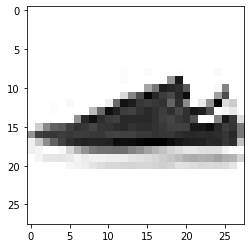

In [22]:
y[6], plt.imshow(X[6],cmap=plt.cm.binary)

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x203aec7bc08>)

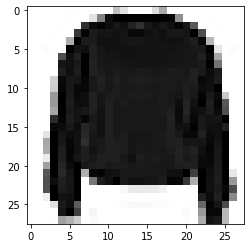

In [23]:
y[7], plt.imshow(X[7],cmap=plt.cm.binary)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x203aecdadc8>)

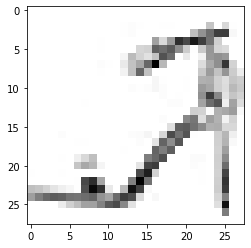

In [24]:
y[8], plt.imshow(X[8],cmap=plt.cm.binary)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 <matplotlib.image.AxesImage at 0x203aed45f88>)

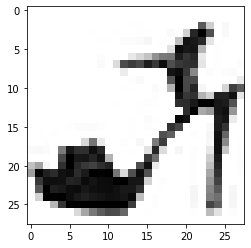

In [25]:
y[9], plt.imshow(X[9],cmap=plt.cm.binary)

## 더 좋을 분류 결과를 얻기 위해 layer 층을 많이 쌓았고 그로 인해 발생되는 over-fitting을 피하기 위해 Dropout을 해줬다. 그 결과 Train_ACC는 0.8838, Test_ACC는 0.8841로 큰 차이가 없었다.

In [ ]:
hw8_1과 같음. 감점은 하지 않겠음.